In [65]:
# import libraries
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.options.display.max_columns = 999
#%matplotlib inline
%load_ext nb_black

# for reproducibility
np.random.seed(42)

# project paths
project_root_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)

data_path = os.path.join(project_root_dir, "data")
os.makedirs(data_path, exist_ok=True)

image_path = os.path.join(project_root_dir, "images")
os.makedirs(image_path, exist_ok=True)


# function for reading data
def read_data(filename, date_cols=None, file_path=data_path):
    csv_path = os.path.join(file_path, filename)
    return pd.read_csv(csv_path, parse_dates=date_cols)


# function for saving data as csv file
def save_dataframe(df, filename, file_path=data_path):
    path = os.path.join(file_path, filename)
    df.to_csv(path, index=False)


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [66]:
from data_module import prepare_data

# read data
train = pd.read_csv(os.path.join(data_path, "Train.csv"))
test = pd.read_csv(os.path.join(data_path, "Test.csv"))

# prepare data
X_train, y_train, X_test, full_pipe = prepare_data(train, test)

<IPython.core.display.Javascript object>

In [67]:
num_cols = X_train.select_dtypes(exclude="object").columns.tolist()
cat_cols = X_train.select_dtypes(include="object").columns.tolist()

X_train = full_pipe.fit_transform(X_train)
X_test = full_pipe.transform(X_test)


# get the list of one-hot encoded categories
ohe_categories = full_pipe.named_transformers_.cat.named_steps.onehotencoder.categories_
# create ohe-hot encoded category column names
new_ohe_features = [
    f"{col}__{val}" for col, vals in zip(cat_cols, ohe_categories) for val in vals
]

# list of all features names
all_features = num_cols + new_ohe_features

X_train = pd.DataFrame(X_train, columns=all_features)
X_test = pd.DataFrame(X_test, columns=all_features)

<IPython.core.display.Javascript object>

In [68]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month__Aug,Month__Dec,Month__Feb,Month__Jul,Month__June,Month__Mar,Month__May,Month__Nov,Month__Oct,Month__Sep,VisitorType__New_Visitor,VisitorType__Other,VisitorType__Returning_Visitor,Weekend__No,Weekend__Yes
0,0.0,0.0,0.0,0.0,5.0,81.083333,0.04,0.050000,0.0,0.0,3.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,3.0,189.000000,0.00,0.066667,0.0,0.0,3.0,2.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,132.0,8.0,445.000000,0.00,0.014286,0.0,0.0,3.0,2.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,3.0,0.000000,0.20,0.200000,0.0,0.0,1.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,4.0,14.000000,0.10,0.150000,0.0,0.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


<IPython.core.display.Javascript object>

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42, stratify=y_train
)

<IPython.core.display.Javascript object>

In [70]:
X_valid = X_valid.reset_index().drop("index", axis=1)
y_valid = y_valid.reset_index().drop("id", axis=1)

<IPython.core.display.Javascript object>

In [71]:
# month columns
month_cols = X_train.filter(like="Month").columns.tolist()
# visitor type columns
visitor_type_cols = X_train.filter(like="VisitorType").columns.tolist()

<IPython.core.display.Javascript object>

In [72]:
month_cols

['Month__Aug',
 'Month__Dec',
 'Month__Feb',
 'Month__Jul',
 'Month__June',
 'Month__Mar',
 'Month__May',
 'Month__Nov',
 'Month__Oct',
 'Month__Sep']

<IPython.core.display.Javascript object>

In [73]:
visitor_type_cols

['VisitorType__New_Visitor',
 'VisitorType__Other',
 'VisitorType__Returning_Visitor']

<IPython.core.display.Javascript object>

In [74]:
cols_to_use = [
    "PageValues",
    "ExitRates",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "VisitorType__New_Visitor",
    "VisitorType__Returning_Visitor",
    "VisitorType__Other",
    "Month__Aug",
    "Month__Dec",
    "Month__Feb",
    "Month__Jul",
    "Month__June",
    "Month__Mar",
    "Month__May",
    "Month__Nov",
    "Month__Oct",
    "Month__Sep",
]

<IPython.core.display.Javascript object>

In [75]:
X_train_sel = X_train[cols_to_use].copy()
X_valid_sel = X_valid[cols_to_use].copy()
X_test_sel = X_test[cols_to_use].copy()

<IPython.core.display.Javascript object>

In [76]:
from joblib import load

# model_path = os.path.join(os.getcwd(), "models", "rf_rnd_search1.joblib")
path = "../models/rf_rnd_search1.joblib"

model = load(open(path, "rb"))

<IPython.core.display.Javascript object>

### Permutation importance

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

<IPython.core.display.Javascript object>

In [78]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

result = permutation_importance(rf_clf, X_valid, y_valid, n_repeats=10, random_state=42)

<IPython.core.display.Javascript object>

In [79]:
import joblib

model_path = os.path.join(project_root_dir, "models")
os.makedirs(model_path, exist_ok=True)


def save_model(model, model_name, path=model_path):
    path = os.path.join(model_path, model_name)
    joblib.dump(model, path)


save_model(rf_clf, "rf_clf.joblib")

<IPython.core.display.Javascript object>

In [80]:
result.importances_mean

array([-1.43651529e-03, -2.73401297e-03,  9.26784059e-05, -7.41427247e-04,
        3.56811863e-03,  2.78035218e-03,  3.70713624e-03,  5.51436515e-03,
        1.16821131e-01,  9.26784059e-05,  9.26784059e-04, -1.80722892e-03,
       -1.71455051e-03, -1.29749768e-03, -9.26784059e-05, -1.43651529e-03,
        0.00000000e+00, -1.11214087e-03, -4.63392030e-05, -4.63392030e-04,
        1.20481928e-03,  5.42168675e-03, -5.56070436e-04,  8.34105653e-04,
       -1.85356812e-04,  0.00000000e+00, -9.73123262e-04, -1.43651529e-03,
       -1.76088971e-03])

<IPython.core.display.Javascript object>

In [81]:
np.save(os.path.join(model_path, "permutation_imp.npy"), result.importances_mean)

<IPython.core.display.Javascript object>

In [82]:
res = np.load(os.path.join(model_path, "permutation_imp.npy"))
res

array([-1.43651529e-03, -2.73401297e-03,  9.26784059e-05, -7.41427247e-04,
        3.56811863e-03,  2.78035218e-03,  3.70713624e-03,  5.51436515e-03,
        1.16821131e-01,  9.26784059e-05,  9.26784059e-04, -1.80722892e-03,
       -1.71455051e-03, -1.29749768e-03, -9.26784059e-05, -1.43651529e-03,
        0.00000000e+00, -1.11214087e-03, -4.63392030e-05, -4.63392030e-04,
        1.20481928e-03,  5.42168675e-03, -5.56070436e-04,  8.34105653e-04,
       -1.85356812e-04,  0.00000000e+00, -9.73123262e-04, -1.43651529e-03,
       -1.76088971e-03])

<IPython.core.display.Javascript object>

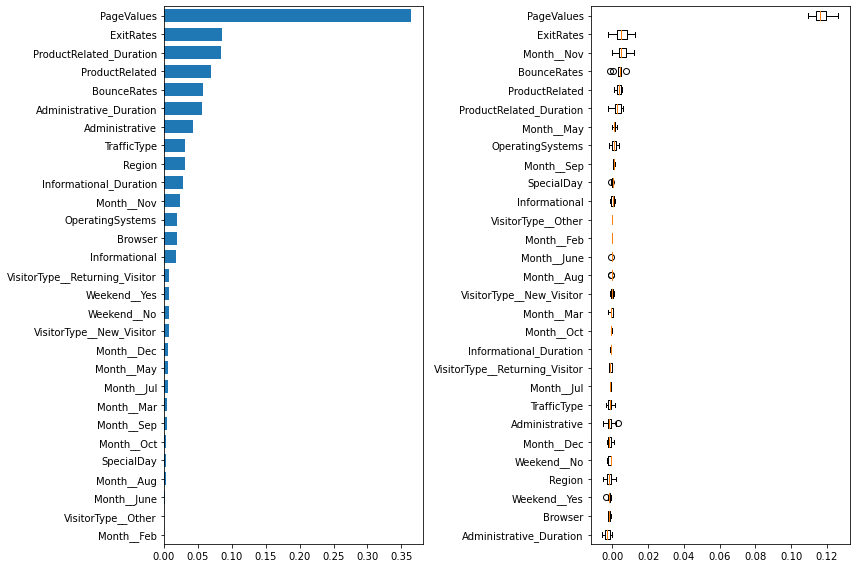

<IPython.core.display.Javascript object>

In [83]:
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(rf_clf.feature_importances_)
tree_indices = np.arange(0, len(rf_clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(
    tree_indices, rf_clf.feature_importances_[tree_importance_sorted_idx], height=0.7
)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(rf_clf.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X_train.columns[perm_sorted_idx],
)
fig.tight_layout()
plt.show()

In [84]:
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=rf_clf.feature_importances_[tree_importance_sorted_idx],
        y=tree_indices,
        orientation="h",
        marker_color="#329932",
    )
)
fig.update_layout(
    title="Random Forest Feature Importances",
    yaxis=dict(
        title="Features",
        tickmode="array",
        tickvals=tree_indices,
        ticktext=X_train.columns[tree_importance_sorted_idx],
    ),
    xaxis=dict(title="Feature Importances"),
    height=700,
)
fig.show()

<IPython.core.display.Javascript object>

In [85]:
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=result.importances[perm_sorted_idx].mean(axis=1).T,
        y=X_train.columns[perm_sorted_idx],
        orientation="h",
        marker_color="#329932",
    )
)
fig.update_layout(
    title="Permutation Importances",
    yaxis=dict(title="Features"),
    xaxis=dict(title="Permutation Importance mean"),
    height=700,
)
fig.show()

<IPython.core.display.Javascript object>

In [86]:
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=result.importances_mean[perm_sorted_idx],
        y=X_train.columns[perm_sorted_idx],
        orientation="h",
        marker_color="#329932",
    )
)
fig.update_layout(
    title="Permutation Importances",
    yaxis=dict(title="Features"),
    xaxis=dict(title="Permutation Importance mean"),
    height=700,
)
fig.show()

<IPython.core.display.Javascript object>

## Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import base64
import pydot
import xml

<IPython.core.display.Javascript object>

In [88]:

def svg_to_fig(svg_bytes, title=None, plot_bgcolor="white", x_lock=False, y_lock=True):
    svg_enc = base64.b64encode(svg_bytes)
    svg = f"data:image/svg+xml;base64, {svg_enc.decode()}"

    # Get the width and height
    xml_tree = xml.etree.ElementTree.fromstring(svg_bytes.decode())
    img_width = int(xml_tree.attrib["width"].strip("pt"))
    img_height = int(xml_tree.attrib["height"].strip("pt"))

    fig = go.Figure()
    # Add invisible scatter trace.
    # This trace is added to help the autoresize logic work.
    fig.add_trace(
        go.Scatter(
            x=[0, img_width],
            y=[img_height, 0],
            mode="markers",
            marker_opacity=0,
            hoverinfo="none",
        )
    )
    fig.add_layout_image(
        dict(
            source=svg,
            x=0,
            y=0,
            xref="x",
            yref="y",
            sizex=img_width,
            sizey=img_height,
            opacity=1,
            layer="below",
        )
    )

    # Adapt axes to the right width and height, lock aspect ratio
    fig.update_xaxes(showgrid=False, visible=False, range=[0, img_width])
    fig.update_yaxes(showgrid=False, visible=False, range=[img_height, 0])

    if x_lock is True:
        fig.update_xaxes(constrain="domain")
    if y_lock is True:
        fig.update_yaxes(scaleanchor="x", scaleratio=1)

    fig.update_layout(plot_bgcolor=plot_bgcolor, margin=dict(r=5, l=5, b=5))

    if title:
        fig.update_layout(title=title)

    return fig


<IPython.core.display.Javascript object>

In [89]:
def visualize_tree(max_depth):
    tree_clf = DecisionTreeClassifier(max_depth=max_depth)
    tree_clf.fit(X_train_sel, y_train)
    dot_data = export_graphviz(
        tree_clf,
        out_file=None,
        filled=True,
        rounded=True,
        feature_names=cols_to_use,
        class_names=["0", "1"],
        proportion=True,
        rotate=False,
        precision=2,
    )

    pydot_graph = pydot.graph_from_dot_data(dot_data)[0]
    svg_bytes = pydot_graph.create_svg()
    fig = svg_to_fig(svg_bytes, title="Decision Tree Explanation")

    return fig

<IPython.core.display.Javascript object>

In [90]:
visualize_tree(3)

<IPython.core.display.Javascript object>

In [91]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train_sel, y_train)

DecisionTreeClassifier(max_depth=3)

<IPython.core.display.Javascript object>

## shap Waterfall chart

In [92]:
from plotly.tools import mpl_to_plotly
from matplotlib import pyplot as plt
import dash
import dash_html_components as html
import dash_core_components as dcc

app = dash.Dash()
shap.plots._waterfall.waterfall_legacy(
    expected_value=explainer.expected_value[1],
    shap_values=shap_values[1],
    features=X_valid_tr[cols].iloc[999],
    feature_names=cols,
    show=False,
)

fig = plt.gcf()

# plotly_fig = mpl_to_plotly(fig)

# app.layout = html.Div([dcc.Graph(id="matplotlib-graph", figure=plotly_fig)])

# app.run_server(debug=True, port=8010, host="localhost")

<IPython.core.display.Javascript object>

In [113]:
# load the model
path = "../models/rf_rnd_search1.joblib"
model = load(open(path, "rb"))

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_sel, y_train)

# create a tree explainer object
explainer = shap.TreeExplainer(rf_clf)
# calculate shap values
shap_values = explainer.shap_values(X_valid_sel.iloc[999])

<IPython.core.display.Javascript object>

In [114]:
explainer.expected_value

array([0.84561409, 0.15438591])

<IPython.core.display.Javascript object>

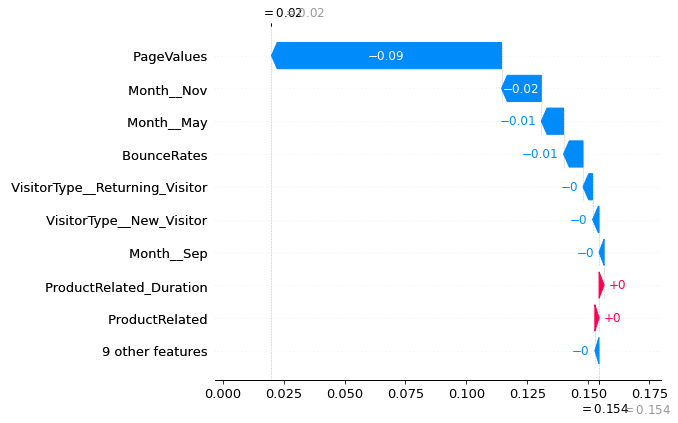

<IPython.core.display.Javascript object>

In [116]:
shap.plots._waterfall.waterfall_legacy(
    expected_value=explainer.expected_value[1],
    shap_values=shap_values[1],
    features=X_valid_sel.iloc[999],
    feature_names=cols_to_use,
    show=True,
)

In [117]:
cols_to_use

['PageValues',
 'ExitRates',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'VisitorType__New_Visitor',
 'VisitorType__Returning_Visitor',
 'VisitorType__Other',
 'Month__Aug',
 'Month__Dec',
 'Month__Feb',
 'Month__Jul',
 'Month__June',
 'Month__Mar',
 'Month__May',
 'Month__Nov',
 'Month__Oct',
 'Month__Sep']

<IPython.core.display.Javascript object>

In [119]:
shap_values[1]

array([-9.44140808e-02, -7.47346587e-04,  1.74046422e-03,  2.06068892e-03,
       -7.97729834e-03, -2.65031025e-03, -3.93033097e-03, -7.28848845e-05,
       -3.25418139e-04,  9.86026343e-04,  1.60001247e-04, -1.28077831e-03,
       -6.90931365e-05,  9.13457140e-04, -9.13161634e-03, -1.63039499e-02,
       -1.25793805e-03, -2.08550290e-03])

<IPython.core.display.Javascript object>

In [122]:
fig = go.Figure()
fig.add_trace(go.Bar(x=shap_values[1], y=cols_to_use, orientation="h"))
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

<IPython.core.display.Javascript object>

In [123]:
y_valid.iloc[999]

target    0
Name: 999, dtype: int64

<IPython.core.display.Javascript object>

In [125]:
np.where(y_valid == 1)

(array([   0,   11,   14,   24,   27,   38,   41,   44,   45,   55,   71,
          72,   78,   80,   82,   95,  105,  108,  117,  137,  158,  166,
         168,  179,  180,  188,  196,  198,  216,  218,  223,  234,  236,
         247,  248,  251,  259,  275,  279,  284,  287,  289,  296,  299,
         312,  313,  322,  328,  338,  340,  354,  362,  367,  379,  381,
         387,  393,  400,  402,  404,  405,  408,  415,  417,  422,  428,
         429,  438,  440,  446,  475,  487,  499,  500,  503,  505,  506,
         508,  515,  520,  525,  530,  531,  534,  535,  546,  547,  551,
         579,  583,  584,  599,  600,  609,  610,  615,  627,  635,  637,
         645,  646,  647,  648,  657,  670,  671,  673,  676,  687,  689,
         706,  717,  718,  720,  732,  733,  741,  742,  743,  747,  749,
         754,  755,  769,  773,  788,  789,  809,  826,  827,  829,  834,
         836,  848,  849,  852,  863,  871,  874,  879,  888,  889,  891,
         893,  897,  900,  926,  933, 

<IPython.core.display.Javascript object>

In [126]:
y_valid.iloc[950]

target    1
Name: 950, dtype: int64

<IPython.core.display.Javascript object>

In [127]:
X_valid_sel.iloc[950]

PageValues                         36.316432
ExitRates                           0.006015
ProductRelated                     34.000000
ProductRelated_Duration           422.523077
BounceRates                         0.000000
VisitorType__New_Visitor            0.000000
VisitorType__Returning_Visitor      1.000000
VisitorType__Other                  0.000000
Month__Aug                          0.000000
Month__Dec                          0.000000
Month__Feb                          0.000000
Month__Jul                          0.000000
Month__June                         0.000000
Month__Mar                          0.000000
Month__May                          0.000000
Month__Nov                          0.000000
Month__Oct                          0.000000
Month__Sep                          1.000000
Name: 950, dtype: float64

<IPython.core.display.Javascript object>

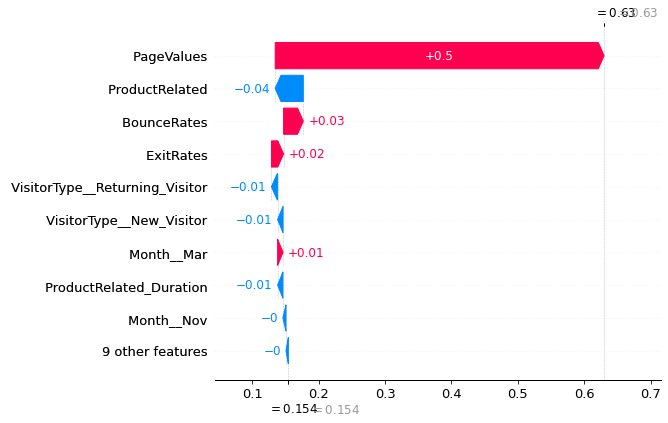

<IPython.core.display.Javascript object>

In [128]:
# calculate shap value

shap_values = explainer.shap_values(X_valid_sel.iloc[950])

shap.plots._waterfall.waterfall_legacy(
    expected_value=explainer.expected_value[1],
    shap_values=shap_values[1],
    features=X_valid_sel.iloc[950],
    feature_names=cols_to_use,
    show=True,
)

In [129]:
rf_clf.predict_proba([X_valid_sel.iloc[950]])

array([[0.37, 0.63]])

<IPython.core.display.Javascript object>

In [186]:
X_valid_sel.iloc[950]

PageValues                         36.316432
ExitRates                           0.006015
ProductRelated                     34.000000
ProductRelated_Duration           422.523077
BounceRates                         0.000000
VisitorType__New_Visitor            0.000000
VisitorType__Returning_Visitor      1.000000
VisitorType__Other                  0.000000
Month__Aug                          0.000000
Month__Dec                          0.000000
Month__Feb                          0.000000
Month__Jul                          0.000000
Month__June                         0.000000
Month__Mar                          0.000000
Month__May                          0.000000
Month__Nov                          0.000000
Month__Oct                          0.000000
Month__Sep                          1.000000
Name: 950, dtype: float64

<IPython.core.display.Javascript object>

In [170]:
fill_color = ["#ff0051" if val >= 0 else "#008bfb" for val in shap_values[1]]
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=shap_values[1],
        y=cols_to_use,
        text=np.round(shap_values[1], 3),
        orientation="h",
        marker_color=fill_color,
    )
)
fig.update_traces(textposition="outside")
fig.update_layout(
    yaxis=dict(title="Features", autorange="reversed"),
    xaxis=dict(
        title=f"""P(Buy= {rf_clf.predict_proba([X_valid_sel.iloc[950]])[0][1]})  
        E(X= {np.round(explainer.expected_value[1],3)})"""
    ),
    height=600,
    template="simple_white",
)
fig.show()

<IPython.core.display.Javascript object>

In [187]:
X_valid_sel.iloc[950]

PageValues                         36.316432
ExitRates                           0.006015
ProductRelated                     34.000000
ProductRelated_Duration           422.523077
BounceRates                         0.000000
VisitorType__New_Visitor            0.000000
VisitorType__Returning_Visitor      1.000000
VisitorType__Other                  0.000000
Month__Aug                          0.000000
Month__Dec                          0.000000
Month__Feb                          0.000000
Month__Jul                          0.000000
Month__June                         0.000000
Month__Mar                          0.000000
Month__May                          0.000000
Month__Nov                          0.000000
Month__Oct                          0.000000
Month__Sep                          1.000000
Name: 950, dtype: float64

<IPython.core.display.Javascript object>

In [189]:
def plot_shap_waterfall_chart(
    PageValues,
    ExitRates,
    ProductRelated,
    ProductRelated_Duration,
    BounceRates,
    VisitorType,
    Month,
):

    # load model

    model_path = "../models/rf_rnd_search1.joblib"
    model = joblib.load(open(model_path, "rb"))

    visitor_type_index = np.where(X_train_sel.columns == VisitorType)[0][0]
    month_index = np.where(X_train_sel.columns == Month)[0][0]

    x = np.zeros(len(X_train_sel.columns))
    x[0] = PageValues
    x[1] = ExitRates
    x[2] = ProductRelated
    x[3] = ProductRelated_Duration
    x[4] = BounceRates
    x[visitor_type_index] = 1
    x[month_index] = 1
    x_series = pd.Series(x, index=cols_to_use)

    # create a tree explainer object
    explainer = shap.TreeExplainer(model)
    # calculate shap values
    shap_values = explainer.shap_values(x_series)

    fill_color = ["#ff0051" if val >= 0 else "#008bfb" for val in shap_values[1]]
    fig = go.Figure()
    fig.add_trace(
        go.Bar(
            x=shap_values[1],
            y=cols_to_use,
            text=np.round(shap_values[1], 3),
            orientation="h",
            marker_color=fill_color,
        )
    )
    fig.update_traces(textposition="outside")
    fig.update_layout(
        yaxis=dict(title="Features", autorange="reversed"),
        xaxis=dict(
            title=f"""P(Buy= {np.round(model.predict_proba([x_series])[0][1],2)})  
            E(X= {np.round(explainer.expected_value[1],3)})"""
        ),
        height=600,
        template="simple_white",
    )

    return fig 


<IPython.core.display.Javascript object>

In [190]:
predict_purchase_intension(
    36.316432,
    0.006015,
    34.000000,
    422.523077,
    0,
    "VisitorType__Returning_Visitor",
    "Month__Sep",
)

<IPython.core.display.Javascript object>